In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

In [2]:
path ="Data.xlsx"
plant = pd.read_excel(path)
plant  

,year,month,day,hour,minute,second,temp,Humdity,light,moisture,water
0,2023,5,14,12,13,15,24,13,86,104,86
1,2023,4,23,6,39,23,4,60,130,657,0
2,2020,3,6,1,11,41,38,22,384,205,71
3,2020,3,2,9,56,28,5,63,115,600,0
4,2022,3,16,2,51,29,18,86,31,506,0
...,...,...,...,...,...,...,...,...,...,...,...
995,2020,1,13,11,6,24,18,70,69,609,0
996,2021,2,2,5,49,26,11,52,16,547,0
997,2023,4,5,5,17,12,38,27,344,243,66
998,2020,8,30,4,21,28,50,26,392,73,90


In [3]:
X = plant.iloc[:, 6:10]
X.shape
X

,temp,Humdity,light,moisture
0,24,13,86,104
1,4,60,130,657
2,38,22,384,205
3,5,63,115,600
4,18,86,31,506
...,...,...,...,...
995,18,70,69,609
996,11,52,16,547
997,38,27,344,243
998,50,26,392,73


In [4]:
y = plant["water"]
y.shape
y

0      86
1       0
2      71
3       0
4       0
       ..
995     0
996     0
997    66
998    90
999    98
Name: water, Length: 1000, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X , y, random_state=1)
#used train test split to split the X and Y into training data and testing data

In [6]:
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()                       
model.fit(Xtrain, ytrain)                  
y_model = model.predict(Xtest)      
#using Gaussian naive bayes to fit and train the data set, 

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.916

In [39]:
Xnew = [[20,50,150,255]]
ynew = model.predict(Xnew)
ynew
Xnew = [[24,20,140,350]]
ynew = model.predict(Xnew)
ynew

F:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

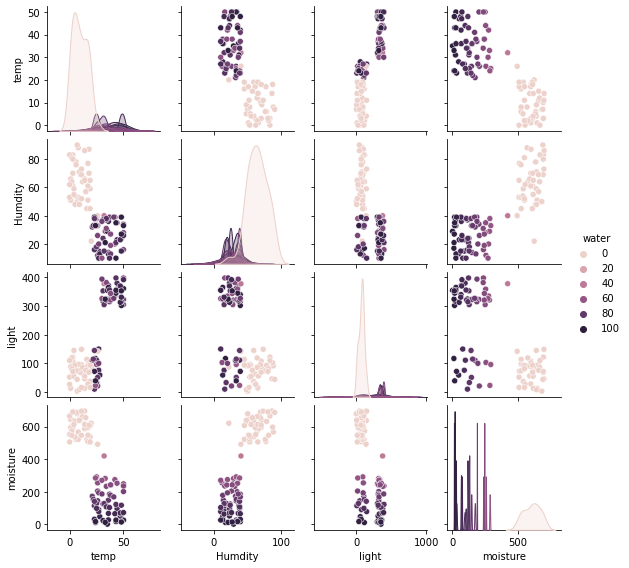

In [58]:
plt2 = plant.iloc[:,6:11]
plant2= plt2.loc[900:1001]
sns.pairplot(plant2, hue = 'water', height=2)
#this shows the relation between l the variables we can notice when the temp is high, moisture is low, when the hum is low, moisture is low and therefor the watering is high

In [59]:
model.score(Xtrain, ytrain)


0.9906666666666667

In [60]:
model.score(Xtest, ytest)

0.916

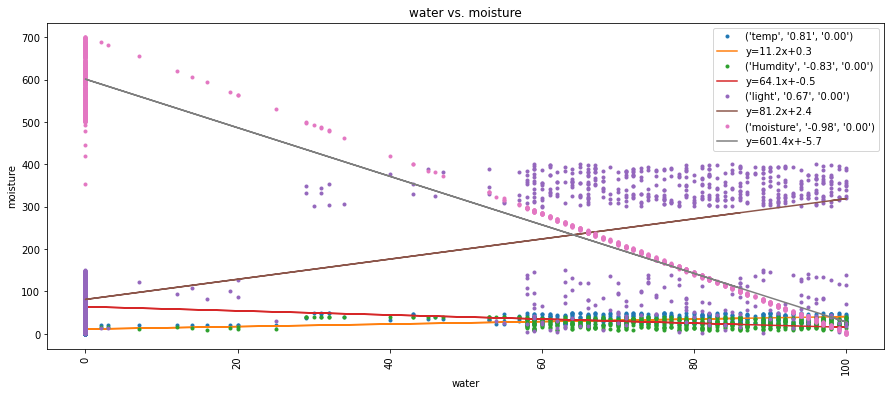

In [91]:
plt.figure(figsize=(15,6))
for column in plant.columns[6:10]:
    x = plant["water"]
    y = plant[column]
    m, b = np.polyfit(x,y,1)
    fit_fn = b + m*x
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x, y)
    plt.plot(x,y, '.', label = (column, "{0:.2f}".format(r_value), "{0:.2f}".format(p_value)))
    plt.plot(x, fit_fn, label = "y={0:.1f}x+{1:.1f}".format(b,m))
plt.xlabel("water")
plt.xticks(rotation = 90)
plt.ylabel(column)
plt.legend()
title = "water vs. "+column
plt.title(title)
plt.show()
plt.close()
#This code generates separate scatter plots and linear regression lines for each column, showing the relationship between the "water" variable and each individual column in the plant DataFrame.

In [84]:
correlation_matrix = plant.iloc[:,6:11].corr()
print(correlation_matrix)

              temp   Humdity     light  moisture     water
temp      1.000000 -0.732160  0.819450 -0.787973  0.813896
Humdity  -0.732160  1.000000 -0.580430  0.800035 -0.827944
light     0.819450 -0.580430  1.000000 -0.648541  0.670456
moisture -0.787973  0.800035 -0.648541  1.000000 -0.983280
water     0.813896 -0.827944  0.670456 -0.983280  1.000000


#Temperature (temp) has a strong positive correlation with light (0.819) and water (0.814). This suggests that higher temperatures are associated with higher light levels and increased water consumption.

#Humidity (Humidity) has a strong negative correlation with temperature (-0.732) and water (-0.828). This indicates that higher humidity levels are associated with lower temperatures and decreased water consumption.

#Light has a moderate positive correlation with temperature (0.819) and a moderate negative correlation with moisture (-0.649). This implies that higher light levels are associated with higher temperatures and lower moisture levels.

#Moisture has a strong negative correlation with water (-0.983). This indicates that as moisture levels increase, water consumption decreases.

In [11]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(ytest, y_model)


mse

16.104

In [12]:
from sklearn.metrics import mean_absolute_error

# Assuming you have your true values in y_true and predicted values in y_pred
mae = mean_absolute_error(ytest, y_model)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.584


In [14]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()

rf_regressor.fit(Xtrain, ytrain)

y_pred = rf_regressor.predict(Xtest)

mse = mean_squared_error(ytest, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1.0041468000000002


In [46]:
Xnew = [[24,20,140,20000]]
ynew = rf_regressor.predict(Xnew)
ynew

F:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5.5])

In [18]:
mae = mean_absolute_error(ytest, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.18380000000000057


In [ ]:
# we can notice that the random forest regressor is not giving accurate values when the moisture value is above threshold, in this case GNB is better